# Project: Investigate a Dataset - No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


> The dataset I have chosen to analyze is titled No-show Appointments. It collects information about patients and focuses on answering the question of why a patient missed their appointment. The dataset includes the following columns: PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hypertension, Diabetes, Alcoholism, Handicap, SMS_received, and No-show. Each of these columns provides insight into the factors that may have influenced a patient's decision to not attend, such as the hospital being located in a distant neighborhood or the patient not receiving an SMS reminder the day before.   
 

### Question(s) for Analysis
> Does receiving an SMS reminder before the appointment reduce the likelihood of a patient missing their appointment?

> Which age groups are most likely to miss their appointment?

> Which gender is most prevalent in the age groups most likely to miss their appointments?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# While optional for current notebooks, if you are having trouble with visualizations,
#   remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Load your data and print out a few lines. What is the size of your dataframe? 
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.
# 
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None


> In the above section of code I imported the database and placed it into a dataframe called df which stands for data frame. I then printed out a list of the columns within that data frame for easy reference later.

## Data Cleaning

In [ ]:
print(df['Age'].max())

print(df['Age'].min())

In [ ]:
df = df[~df.Age.isin([-1, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115])]


> The first step I took in cleaning the data was to examine the maximum and minimum ages. This was done to ensure that the ages included in the analysis were within a realistic range. The maximum and minimum ages were identified as 115 and -1, respectively, which allowed me to focus the cleaning process on removing unrealistic age values.

> To exclude these invalid ages, I first filtered the dataframe by using the .isin function in conjuction with the not operator. After the extraneous values were removed the new dataset was then assigned into the original dataframe for further analysis. The values removed included -1 and 97-115 as these are not within the typical human lifespan range.

<a id='eda'></a>
## Exploratory Data Analysis

### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

def smsReceived_and_noShow():
    dataframe1 = pd.DataFrame(df['SMS_received'])
    dataframe2 = pd.DataFrame(df['No-show'])

    newDF = pd.concat([dataframe1, dataframe2], axis=1)

    grouped = newDF.groupby([(newDF['No-show'] == 'Yes') & (newDF['SMS_received'] == True)]).count()

    return grouped.plot(kind = 'pie', x = 'No-show', y = 'SMS_received', title = 'Percentage of No-Shows who received an SMS')

def age_and_noShow():
    dataframe1 = pd.DataFrame((df['Age']))
    dataframe2 = pd.DataFrame(df['No-show'])
    
    jointDF = pd.concat([dataframe1, dataframe2], axis=1)

    no_show_df = jointDF[jointDF['No-show'] == 'Yes']
    
    grouped = no_show_df.groupby('Age').size()
    
    plot = grouped.plot(kind='bar', figsize=(15, 8))
    plot.set_title("No-Shows by Age", fontsize = 15)
    plot.set_xlabel("Age", fontsize = 15)  
    plot.set_ylabel("Total Count", fontsize = 15)  
    return plot



print(age_and_noShow())
print(smsReceived_and_noShow())

> The above code defines two functions smsReceived_and_noShow() and age_and_noShow(). The purpose of the first function is to analyze whether receiving an SMS reminder affects the likelihood of a patient not showing for their appointment. While the purpose of the second function is to explore the relationship between a patient’s age and their likelihood of not attending an appointment. After both of the functions have been analyzed they are then put into easy to read visuals.

In [ ]:


age_gender_counts = df.groupby(['Age', 'Gender']).size().unstack(fill_value=0)

sorted_data = df.sort_values(by = 'Age', ascending = True)

X_axis = np.arange(len(age_gender_counts))

plt.figure(figsize=(100, 50))

gap = 0.4

width = 0.3


plt.bar(X_axis, age_gender_counts['F'], width, label='Women', color = 'orange')
plt.bar(X_axis + gap, age_gender_counts['M'], width, label='Men', color = 'blue')


plt.xticks(X_axis, age_gender_counts.index, fontsize = 60, rotation = 90)
plt.yticks(fontsize = 50)
plt.xlabel("Age", fontsize = 100) 
plt.ylabel("Total count", fontsize = 100) 
plt.title("Gender Distribution by Age", fontsize = 100) 
plt.legend(fontsize = 100)
plt.show() 



  


> The above code generates a graph displaying the gender distribution for each age within the specified range. By first analyzing the 'No-Shows by Age' graph, you can identify the age group with the highest no-show rates. Then, using the 'Gender Distribution by Age' graph, you can determine which gender is most prevalent in that age group. This information can help you implement targeted interventions to increase attendance for future appointments.

AxesSubplot(0.125,0.11;0.775x0.77)


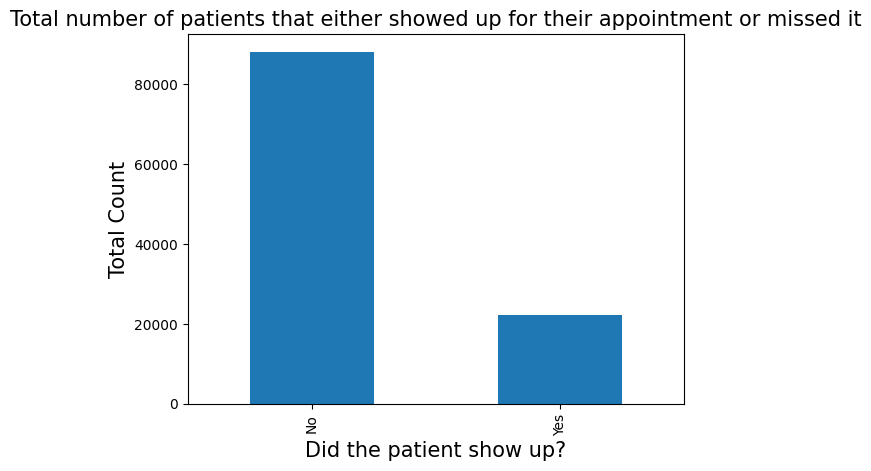

In [9]:

noShowCount = df['No-show'].value_counts()

plot = noShowCount.plot(kind = 'bar')
plot.set_title("Total number of patients that either showed up for their appointment or missed it", fontsize = 15)
plot.set_xlabel("Did the patient show up?", fontsize = 15)  
plot.set_ylabel("Total Count", fontsize = 15)  

print(plot)

> The code above accesses the No-show column within the DataFrame labeled DF and performs a value count on it. This returns the number of patients who showed up and those who did not attend their appointments. This analysis is crucial for understanding the current performance of the medical office and identifying areas for improvement in reducing patient no-shows.

<a id='conclusions'></a>
## Conclusions


> In summary, my analysis of SMS reminders and no-shows revealed that reminders are effective in reducing missed appointments. Furthermore, my examination of age and no-show behavior identified the age groups 0, 1, 17, 19, 30, and 53 as the most likely to miss their appointments. To gain deeper insights into who is most likely to miss their appointments, I analyzed the gender distribution within these age groups. The results showed that males were most prevalent among no-shows at ages 0 and 1, while females were most prevalent at ages 17, 19, 30, and 53. This information provides the company with valuable insights into targeting appointment reminders more effectively, as they now have a clearer understanding of who is missing their appointments.

> However, one limitation of my analysis is the lack of grouping for age values. Each age was treated as its own group, but grouping ages into broader ranges could help identify clearer patterns and trends.


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should see output that starts with `NbConvertApp] Converting notebook`, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb